In [1]:
from os import listdir
from os.path import isfile, join
import re
import csv
import gensim
import numpy as np
import logging
import os
import pandas as pd 
import sys
import sklearn.metrics
import sklearn
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import random
import math
import warnings
from joblib import Parallel, delayed
import scipy.stats
from scipy.stats.stats import pearsonr
random.seed(1)
import xlwt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator,AutoMinorLocator, MultipleLocator, FuncFormatter
import numpy as np
import pickle
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from outletsBiasRatings import outletsBiasRatingsAllSides, outletAbbreviationToFullName 

outletsBiasRatings = outletsBiasRatingsAllSides
outlets = list(outletsBiasRatings.keys())

startYear=2000
endYear = 2019
years = list(range(startYear,endYear+1))
print(len( outlets ))
print(outlets)
print(years)

47
['alternet', 'democracynow', 'db', 'hp', 'theintercept', 'jacobin', 'motherjones', 'thenewyorker', 'thenation', 'slate', 'vox', 'cnn', 'nyt', 'abcnews', 'theatlantic', 'buzzfeed', 'cbs', 'economist', 'guardian', 'nbcnews', 'politico', 'timemagazine', 'wp', 'npr', 'ap', 'bbc', 'bloomberg', 'csm', 'reuters', 'thehill', 'usatoday', 'wsj', 'reason', 'we', 'wt', 'fox', 'americanspectator', 'bre', 'theblaze', 'cbn', 'dailycaller', 'dailymail', 'dailywire', 'thefederalist', 'nationalreview', 'nyp', 'newsmax']
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [2]:
def processOutlet(outlet,startYear,endYear,minimumNumberOfHeadlinesPerFile):
    print( outlet , end =',')
    inputPath = rf'./headlinesData//{outlet}'
    filesInFolder=os.listdir(inputPath)
    
    outletStats={}
    for file in filesInFolder:
        m = re.match('^(\d{4})\.csv$', file, flags=0)
        if m:
            fileYear = int(m.group(1))
            fileYearStr=str(fileYear)
            if startYear <= fileYear <= endYear:
                df=pd.read_csv(f"{inputPath}/{fileYearStr}.csv")
                numberOfHeadlines = df.shape[0]
                print( fileYearStr , end =',')
                if numberOfHeadlines>minimumNumberOfHeadlinesPerFile:
                    outletStats[fileYearStr]=numberOfHeadlines
    
    return outletStats

In [3]:
minimumNumberOfTokensPerFile=0 #Minimum number of tokens per year file to be included

outletsStats={}
for outlet in outlets:
    outletsStats[outlet]=processOutlet(outlet, startYear,endYear,minimumNumberOfTokensPerFile)
    print()

alternet,2012,2013,2014,2015,2016,2017,2018,2019,
democracynow,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,
db,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,
hp,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,
theintercept,2014,2015,2016,2017,2018,2019,
jacobin,2011,2012,2013,2014,2015,2016,2017,2018,2019,
motherjones,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,
thenewyorker,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,
thenation,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,
slate,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,
vox,2014,2015,2016,2017,2018,2019,
cnn,2011,2012,2013,2014,2015,2016,2017,2018,2019,
nyt,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2

In [4]:
outletsStats

{'alternet': {'2012': 192,
  '2013': 344,
  '2014': 2725,
  '2015': 3645,
  '2016': 3731,
  '2017': 2851,
  '2018': 3759,
  '2019': 4685},
 'democracynow': {'2000': 720,
  '2001': 881,
  '2002': 726,
  '2003': 931,
  '2004': 920,
  '2005': 814,
  '2006': 780,
  '2007': 833,
  '2008': 908,
  '2009': 980,
  '2010': 1029,
  '2011': 1221,
  '2012': 1126,
  '2013': 1016,
  '2014': 1045,
  '2015': 1207,
  '2016': 1391,
  '2017': 1271,
  '2018': 1118,
  '2019': 1053},
 'db': {'2008': 1379,
  '2009': 8252,
  '2010': 8401,
  '2011': 9082,
  '2012': 16982,
  '2013': 15100,
  '2014': 11483,
  '2015': 10289,
  '2016': 9437,
  '2017': 9129,
  '2018': 9966,
  '2019': 10085},
 'hp': {'2005': 3396,
  '2006': 5401,
  '2007': 2269,
  '2008': 16639,
  '2009': 19643,
  '2010': 21312,
  '2011': 31006,
  '2012': 32432,
  '2013': 31766,
  '2014': 33967,
  '2015': 31239,
  '2016': 31806,
  '2017': 30589,
  '2018': 27019,
  '2019': 24999},
 'theintercept': {'2014': 322,
  '2015': 996,
  '2016': 1562,
  '2017':

## Save outletsStats

In [5]:
with open('./outletsStats', 'wb') as fileHandle:
    pickle.dump(outletsStats, fileHandle, protocol=pickle.HIGHEST_PROTOCOL)

## Load outletsStats

In [6]:
with open('./outletsStats', 'rb') as fileHandle:
    outletsStats = pickle.load(fileHandle)

In [7]:
def getNumberOfHeadlines(outletsStats,outlets,startYear, endYear):
    years= [str(year) for year in range(startYear,endYear+1)]
    nRows=len( outlets )
    nCols=len( years )
    M=np.zeros((nRows,nCols))
    for outletIndex, outlet in enumerate(outlets):
        for yearIndex,year in enumerate(reversed(list(outletsStats[outlet].keys()))):
            M[outletIndex][-yearIndex-1]=outletsStats[outlet][year]
    return M

In [8]:
M=getNumberOfHeadlines(outletsStats, outlets,startYear,endYear)

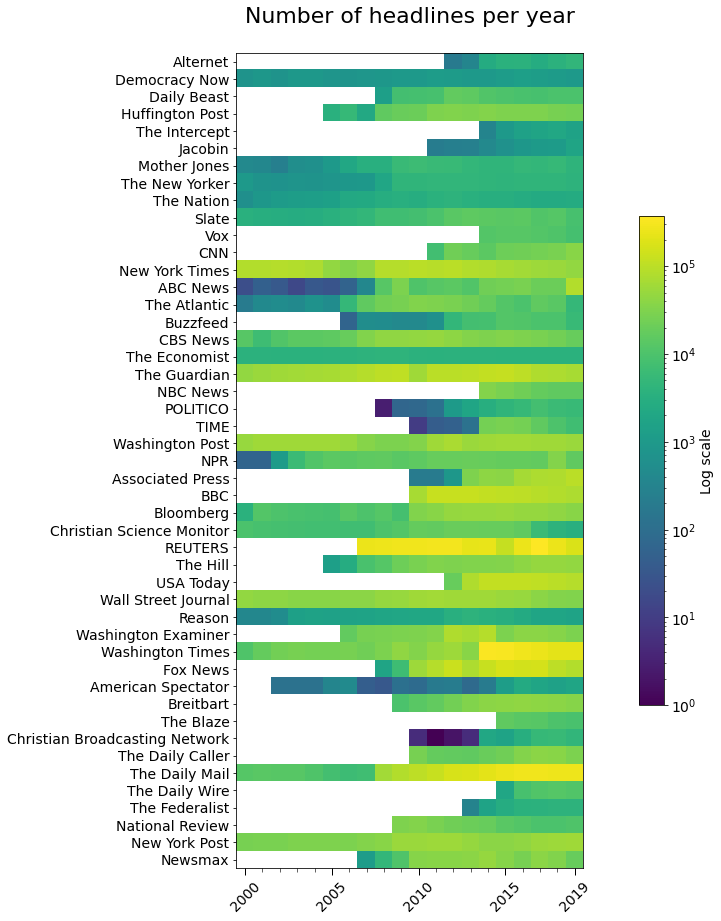

In [10]:
from matplotlib.colors import LogNorm
import matplotlib
plt.figure(figsize=(20, 15)) 
plt.imshow(M,norm=matplotlib.colors.LogNorm())
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().tick_params(axis="x", which="major", length=7,width=1)        
plt.gca().tick_params(axis="x", which="minor", length=4)     
        
cbar=plt.colorbar(shrink=0.6,)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='Log scale',fontsize=14) 
plt.xticks(list(range(0,20,5))+[19],years[::5]+[2019],rotation=45,fontsize=14)
plt.yticks(range(0,47),[outletAbbreviationToFullName[outlet] for outlet in outlets],fontsize=14)
plt.title("Number of headlines per year",fontsize=22,pad=30)
figureFileName='numberOfHeadlinesPerYear'
plt.savefig(f'../manuscript/figures/sm/{figureFileName}.png',dpi=300,bbox_inches='tight',pad_inches=0)#High-resolution
plt.show()